In [34]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import itertools


## PROBLEM 1

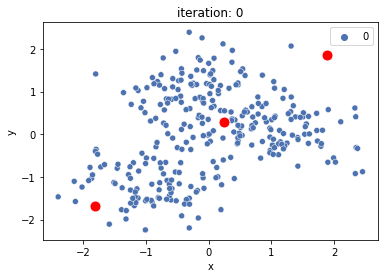

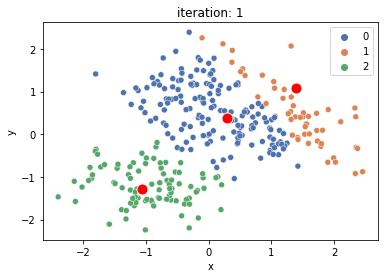

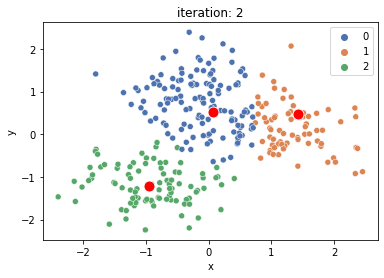

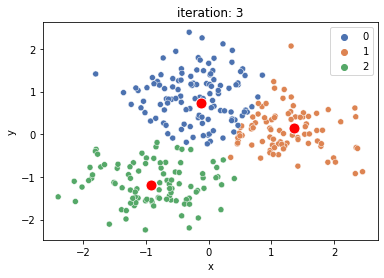

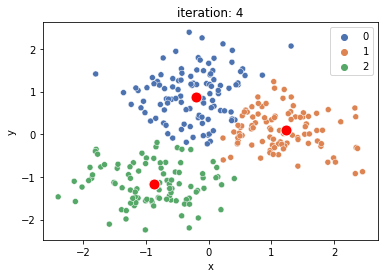

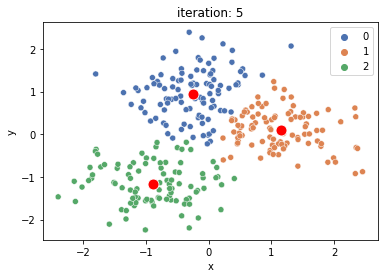

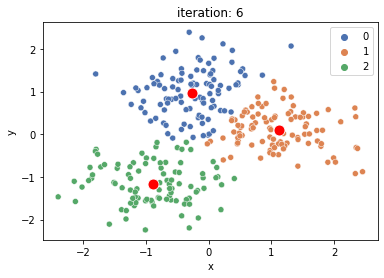

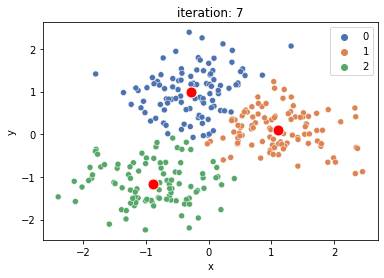

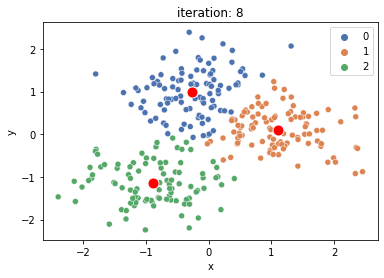

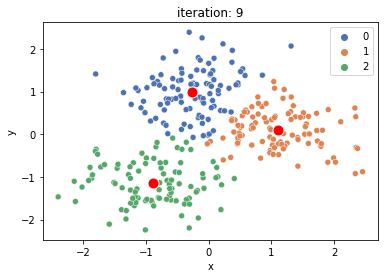

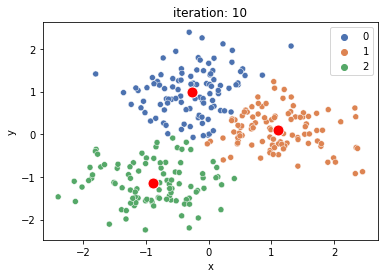

In [53]:
## generating random data points ##

features, true_labels = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=4,
    random_state=42
)

## fitting the data ##

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## creating a 3 random inital centroids within the data range ##

min_coord, max_coord = np.min(scaled_features, axis=0), np.max(scaled_features, axis=0)
centroids = [random.uniform(min_coord,max_coord) for i in range(3)]
centroids = np.concatenate([[centroids[0]],[centroids[1]],[centroids[2]]])

centroid_list=[centroids]
cluster_labels=[itertools.repeat(0,300)]

## looping through the kmeans algorithm and storing each iteration of centroids ##
## once the centroid has not moved from the previous centroid location the loop breaks ##

for i in range(100):

    kmeans = KMeans(
        init=centroids,
        n_clusters=3,
        n_init=1,
        max_iter=1,
        random_state=42
    )

    kmeans.fit(scaled_features)
    centroids = kmeans.cluster_centers_
    centroid_list.append(centroids)
    cluster_labels.append(kmeans.labels_)

    if np.all(centroid_list[i] == centroid_list[i-1]):
        break

## plotting the iterations of clustering ##

x, y = scaled_features.T

for i in range(len(centroid_list)):

    m,n = centroid_list[i].T
    sns.scatterplot(x=x,y=y, hue = (cluster_labels[i]), palette="deep")
    sns.scatterplot(x=m,y=n, color="red", s= 120)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('iteration: '+str(i))
    plt.show()